# h1导入相关的包，并处理数据

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data2-7-27.csv')

In [3]:
col = ["bmi", "w/h", "fet", "tunica thickness", "fom", "PI", "RI", "S/D", "ue", "ratio", "E2", "P"]
X_all = df[col]
Y_all = df["pregnancy"]

## h2验证特征有无空值等因素

In [4]:
np.isnan(X_all).any()

bmi                 False
w/h                 False
fet                 False
tunica thickness    False
fom                 False
PI                  False
RI                  False
S/D                 False
ue                  False
ratio               False
E2                   True
P                    True
dtype: bool

## h2数据分组

In [5]:
X_np_number, X_np_all, X_np_other, Y_np_all = np.split(df, [1,11,13], axis=1)

In [6]:
X_np_number.head()

,number
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [7]:
X_np_all.head()

,bmi,w/h,fet,tunica thickness,fom,PI,RI,S/D,ue,ratio
0,20.3,0.78,0.0,12.0,1.0,1.44,0.81,1.7,3.0,0.6
1,20.8,0.93,0.0,9.0,2.0,0.63,0.46,1.6,2.0,0.6
2,25.0,0.82,0.0,10.0,2.0,0.92,0.56,1.0,3.0,1.2
3,22.4,0.76,0.0,11.8,2.0,0.93,0.54,4.2,4.0,1.8
4,22.9,0.79,0.0,8.3,2.0,0.77,0.62,2.7,2.0,0.6


In [8]:
Y_np_all.head()

,pregnancy
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


## h2划分训练集与测试集

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_np_train, X_np_test, Y_np_train, Y_np_test = train_test_split(X_np_all, Y_np_all, random_state=1, train_size=0.6)

## h2尝试SVM模型

In [11]:
from sklearn import svm
from pandas import Series, DataFrame

In [12]:
clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')

In [13]:
clf.fit(X_np_train, Y_np_train.values.ravel())

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### h3训练集检测

In [14]:
# print(clf.score(X_np_train, Y_np_train))  # 精度
grade = clf.score(X_np_train, Y_np_train)
y_hat = clf.predict(X_np_train)
# show_accuracy(y_hat, Y_np_train, '训练集')
print("训练集精度 : "+str(grade))
print("y_hat_1 : "+ str(y_hat))

训练集精度 : 1.0
y_hat_1 : [1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1.]


### h3测试集检测

In [15]:
# print(clf.score(X_np_test, Y_np_test))
grade = clf.score(X_np_test, Y_np_test)
y_hat = clf.predict(X_np_test)
# show_accuracy(y_hat, X_np_test, '测试集')
print("测试集精度 : "+str(grade))
print("y_hat_1 : "+ str(y_hat))

测试集精度 : 0.4473684210526316
y_hat_1 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### h3查看决策函数

In [16]:
print('decision_function:\n', clf.decision_function(X_np_train))
print('\npredict:\n', clf.predict(X_np_train))

decision_function:
 [ 0.79999995  0.8        -0.8         0.8        -0.8         0.8
 -0.8         0.8         0.8        -0.8        -0.8         0.8
 -0.8        -0.8         0.8         0.79999999  0.8        -0.8
  0.8        -0.8        -0.8        -0.8        -0.8         0.8
  0.8         0.8        -0.8         0.8        -0.79999995 -0.8
 -0.8        -0.8        -0.8         0.8         0.8        -0.8
 -0.8        -0.8         0.8        -0.8        -0.8         0.8
  0.8        -0.8        -0.8         0.8         0.8        -0.8
 -0.8        -0.8         0.8         0.8         0.8         0.8
  0.8         0.8       ]

predict:
 [1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1.]


# 核的类别

 kernel ：核函数，默认是rbf，可以是
 
     + linear    线性：u’v
     + poly     多项式：(gamma*u’*v + coef0)^degree
     + rbf      RBF函数：exp(-gamma|u-v|^2)
     + sigmoid   sigmoid：tanh(gamma*u’*v + coef0)
     + precomputed

# 高斯核

In [17]:
clf_2 = svm.SVC(C=0.5, kernel='rbf', gamma=140, decision_function_shape='ovo')
clf_2.fit(X_np_train, Y_np_train.values.ravel())

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=140, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
grade = clf_2.score(X_np_train, Y_np_train)
y_hat = clf_2.predict(X_np_train)

print("训练集精度 : "+str(grade))
print("y_hat_1 : "+ str(y_hat))

训练集精度 : 1.0
y_hat_1 : [1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1.]


In [19]:
grade = clf_2.score(X_np_test, Y_np_test)
y_hat = clf_2.predict(X_np_test)

print("测试集精度 : "+str(grade))
print("y_hat_1 : "+ str(y_hat))

测试集精度 : 0.6578947368421053
y_hat_1 : [0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0.]


 ## 高斯核部分结果
 
| 惩罚参数C | 核函数 | dgamma | train_grade | test_grade |
| :-------: | :----: | :----: | :---------: | :--------: |
|   0.8   |   rdf |  300  | 1.0 | 0.5789473684210527  |
|   0.8   |   rdf | 160  |  1.0 | 0.6052631578947368  |
|   0.8   |   rdf | 120  |  1.0 | 0.6578947368421053  |
|   0.8   |   rdf |  50  |  1.0 | 0.6052631578947368  |
|   0.8   |   rdf |  20  |  1.0 | 0.4473684210526316  |
|   ---   |      |    .|     |             .|
|   0.5   |   rdf |  10  |  1.0 | 0.4210526315789473  |
|   0.5   |   rdf |  50  |  1.0 | 0.6052631578947368  |
|   0.5   |   rdf |  90  |  1.0 | 0.6315789473684210  |
|   0.5   |   rdf |  120 |  1.0 | 0.6578947368421053  |
|   0.5   |   rdf |  150 |  1.0 | 0.6315789473684210  |


 ## 高斯核目前最优
 
| 惩罚参数C | 核函数 | dgamma | train_grade | test_grade |
| :-------: | :----: | :----: | :---------: | :--------: |
|   0.8   |   rdf | 120  |  1.0 | 0.6578947368421053  |
|   0.5   |   rdf |  120 |  1.0 | 0.6578947368421053  |

# 多项式核

In [20]:
clf_3 = svm.SVC(C=0.5, kernel='poly', degree=1, gamma=90, decision_function_shape='ovo')
clf_3.fit(X_np_train, Y_np_train.values.ravel())

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=1, gamma=90, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
grade = clf_3.score(X_np_train, Y_np_train)
y_hat = clf_3.predict(X_np_train)

print("训练集精度 : "+str(grade))
print("y_hat_1 : "+ str(y_hat))

训练集精度 : 0.7142857142857143
y_hat_1 : [1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1.]


In [22]:
grade = clf_3.score(X_np_test, Y_np_test)
y_hat = clf_3.predict(X_np_test)

print("测试集精度 : "+str(grade))
print("y_hat_1 : "+ str(y_hat))

测试集精度 : 0.6842105263157895
y_hat_1 : [0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1.]


## 多项式核部分结果

| 惩罚参数C | 核函数 | degree | dgamma | train_grade |    test_grade    |
| :-------: | :----: | :----: | :----: | :---------: | :----------------: |
|   0.8   |  poly  |   1   |   40 | 0.660714285 | 0.684210526315789  |
|   0.8   |  poly  |   1   |   50 | 0.732142857 | 0.710526315789473  |
|   0.8   |  poly  |   1   |   60 | 0.696428571 | 0.684210526315789  |
|   0.8   |  poly  |   1   |  120  | 0.660714285 | 0.631578947368421  |
|   0.8   |  poly  |   1   |  140  | 0.660714285 | 0.631578947368421  |
|   0.8   |  poly  |   1   |  150  | 0.660714285 | 0.631578947368421  |
|   ---   |      |      .|     |         |              |
|   0.8   |  poly  |   2   |   40 | 0.875     | 0.605263157894736  |
|   0.8   |  poly  |   2   |   50 | 0.785714285 | 0.473684210526315  |
|   0.8   |  poly  |   2   |   60 | 0.75      | 0.631578947368421  |
|   0.8   |  poly  |   2   |  120  | 0.75      | 0.631578947368421  |
|   ---   |      |      .|     |         |              |
|   0.8   |  poly  |   3   |   40 | 1.00      | 0.605263157894736  |
|   0.8   |  poly  |   3   |   50 | 1.00      | 0.578947368421052  |
|   0.8   |  poly  |   3   |   60 | 1.00      | 0.578947368421052  |
|   0.8   |  poly  |   3   |   30 | 1.00      | 0.578947368421052  |
|   ---   |      |      .|     |         |              |
|   ---   |      |      .|     |         |              |
|   0.5   |  poly  |   1   |   40 | 0.660714285 | 0.6578947368421053 |
|   0.5   |  poly  |   1   |   50 | 0.678571428 | 0.6578947368421053 |
|   0.5   |  poly  |   1   |   60 | 0.660714285 | 0.6842105263157895 |
|   0.5   |  poly  |   1   |   70 | 0.714285714 | 0.7105263157894737 |
|   0.5   |  poly  |   1   |   80 | 0.732142857 | 0.7105263157894737 |


## 多项式目前最优

| 惩罚参数C | 核函数 | degree | dgamma | train_grade |    test_grade    |
| :-------: | :----: | :----: | :----: | :---------: | :----------------: |
|   0.8   |  poly  |   1   |   40 | 0.660714285 | 0.684210526315789  |
|   0.8   |  poly  |   1   |   50 | 0.732142857 | 0.710526315789473  |
|   0.8   |  poly  |   1   |   60 | 0.696428571 | 0.684210526315789  |
|   ---   |      |      .|     |         |              |
|   ---   |      |      .|     |         |              |
|   0.5   |  poly  |   1   |   60 | 0.660714285 | 0.6842105263157895 |
|   0.5   |  poly  |   1   |   70 | 0.714285714 | 0.7105263157894737 |
|   0.5   |  poly  |   1   |   80 | 0.732142857 | 0.7105263157894737 |

## 趋势简易分析

In [23]:
import matplotlib.pyplot as plt

#### 定义精度求解函数

In [24]:
def getRBFGrade(c:list, gamma:int, X_np_train, Y_np_train, X_np_test, Y_np_test):
    grades = []
    for one in c:
        clf_tmp = svm.SVC(C=one, kernel='rbf', gamma=gamma, decision_function_shape='ovo')
        clf_tmp.fit(X_np_train, Y_np_train.values.ravel())
        grade = clf_tmp.score(X_np_test, Y_np_test)
        grades.append(grade)
    return grades

def getPOLYGrade(c:float, degree:int, gamma:int, X_np_train, Y_np_train, X_np_test, Y_np_test):
    grades = []
    for one in c:
        clf_tmp = svm.SVC(C=one, kernel='poly', degree=degree, gamma=gamma, decision_function_shape='ovo')
        clf_tmp.fit(X_np_train, Y_np_train.values.ravel())
        grade = clf_tmp.score(X_np_test, Y_np_test)
        grades.append(grade)
    return grades

In [25]:
def getRBFGrade2(c:float, gamma:list, X_np_train, Y_np_train, X_np_test, Y_np_test):
    grades = []
    for one in gamma:
        clf_tmp = svm.SVC(C=c, kernel='rbf', gamma=one, decision_function_shape='ovo')
        clf_tmp.fit(X_np_train, Y_np_train.values.ravel())
        grade = clf_tmp.score(X_np_test, Y_np_test)
        grades.append(grade)
    return grades

def getPOLYGrade2(c:float, degree:int, gamma:int, X_np_train, Y_np_train, X_np_test, Y_np_test):
    grades = []
    for one in gamma:
        clf_tmp = svm.SVC(C=c, kernel='poly', degree=degree, gamma=one, decision_function_shape='ovo')
        clf_tmp.fit(X_np_train, Y_np_train.values.ravel())
        grade = clf_tmp.score(X_np_test, Y_np_test)
        grades.append(grade)
    return grades

#### 测试精度随着c变化趋势【高斯核】

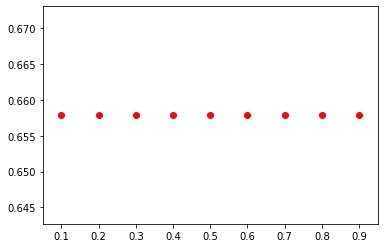

In [26]:
list_c = np.arange(0.1, 1, 0.1)
grade = getRBFGrade(list_c, 120, X_np_train, Y_np_train, X_np_test, Y_np_test)
plt.scatter(list_c, grade, color="red")
plt.show()

#### 测试精度随着gamma的变化【高斯核】

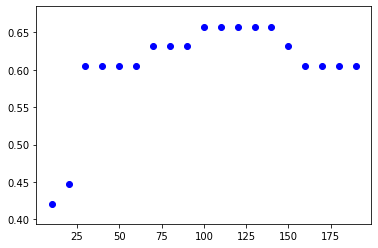

In [27]:
list_c = np.arange(10, 200, 10)
grade = getRBFGrade2(0.8, list_c, X_np_train, Y_np_train, X_np_test, Y_np_test)
plt.scatter(list_c, grade, color="blue")
plt.show()

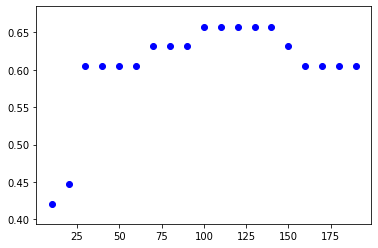

In [28]:
list_c = np.arange(10, 200, 10)
grade = getRBFGrade2(0.5, list_c, X_np_train, Y_np_train, X_np_test, Y_np_test)
plt.scatter(list_c, grade, color="blue")
plt.show()

#### 测试精度随着c的变化【多项式核】

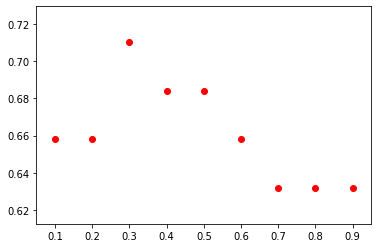

In [29]:
list_c = np.arange(0.1, 1, 0.1)
grade = getPOLYGrade(list_c, 1, 120, X_np_train, Y_np_train, X_np_test, Y_np_test)
plt.scatter(list_c, grade, color="red")
plt.show()

#### 测试精度随着gamma的变化【多项式核】

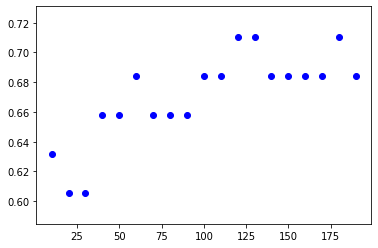

In [30]:
list_c = np.arange(10, 200, 10)
grade = getPOLYGrade2(0.3, 1, list_c, X_np_train, Y_np_train, X_np_test, Y_np_test)
plt.scatter(list_c, grade, color="blue")
plt.show()